## Politics analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [ ]:
dataset = pd.read_csv("../data/dataset_politics_preds.csv")
dataset = dataset.drop(['Unnamed: 0'], axis=1)
dataset['predicted_emotions'] = dataset['predicted_emotions'].apply(ast.literal_eval)
dataset

,text,speaker_party,speaker_role,speaker_name,debate_title,date,year,predicted_emotions
0,"Mr President, it was unexpected, but it is a ...",PPE,MEP,Joseph Daul,Election of the President of the European Parl...,2009-07-14,2009,[desire]
1,"Mr President, on behalf of our group I would ...",S&D,MEP,Martin Schulz,Election of the President of the European Parl...,2009-07-14,2009,[admiration]
2,"Mr President, first of all congratulations fro...",ALDE,MEP,Guy Verhofstadt,Election of the President of the European Parl...,2009-07-14,2009,"[admiration, optimism]"
3,"Mr President, may I congratulate you on your p...",ECR,MEP,Timothy Kirkhope,Election of the President of the European Parl...,2009-07-14,2009,[admiration]
4,"Mr President, I am pleased that a neighbour f...",GUE/NGL,MEP,Lothar Bisky,Election of the President of the European Parl...,2009-07-14,2009,"[gratitude, optimism]"
...,...,...,...,...,...,...,...,...
38765,"– Madam President, like the Roma community ac...",GUE/NGL,MEP,Mick Wallace,Segregation and discrimination of Roma childre...,2023-09-14,2023,[disappointment]
38766,"– Madam President, I was happy to answer the ...",GUE/NGL,MEP,Clare Daly,Framework for ensuring a secure and sustainabl...,2023-09-14,2023,[realization]
38767,"on behalf of the PPE Group. – Madam President,...",PPE,MEP,Rainer Wieland,"Parliamentarism, European citizenship and demo...",2023-09-14,2023,[neutral]
38768,"– Madam President, I too voted against this f...",GUE/NGL,MEP,Clare Daly,"Parliamentarism, European citizenship and demo...",2023-09-14,2023,[disapproval]


### How specific emotions are used are used across parties, time periods, or topics to shape opinion?

In [3]:
emotions = [
    "admiration", "amusement", "anger", "annoyance", "approval",
    "caring", "confusion", "curiosity", "desire", "disappointment",
    "disapproval", "disgust", "embarrassment", "excitement", "fear",
    "gratitude", "grief", "joy", "love", "nervousness", "optimism",
    "pride", "realization", "relief", "remorse", "sadness", "surprise", "neutral"
]

In [4]:
mlb = MultiLabelBinarizer(classes=emotions)
emotion_df = pd.DataFrame(mlb.fit_transform(dataset['predicted_emotions']), 
                          columns=mlb.classes_, 
                          index=dataset.index)

texts = pd.concat([dataset, emotion_df], axis=1)
by_year = texts.groupby('year')[mlb.classes_].sum()
by_year

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
year,,,,,,,,,,,,,,,,,,,,,
2009,155,0,0,11,302,81,6,30,75,78,...,0,2,213,0,3,0,71,12,11,748
2010,673,3,1,16,1763,220,12,66,168,226,...,3,3,803,0,22,0,142,58,30,2789
2011,809,0,1,29,3417,249,26,114,183,235,...,0,4,896,1,27,0,169,57,26,4182
2012,519,1,1,15,2305,187,15,107,124,162,...,2,7,571,0,13,0,100,23,33,2652
2013,61,0,0,5,34,25,5,16,23,22,...,0,2,59,0,1,0,7,4,4,158
2014,46,0,0,4,25,21,1,22,12,23,...,0,0,55,0,1,0,6,7,1,168
2015,91,0,1,6,69,50,9,41,27,35,...,2,0,82,0,2,0,12,9,9,257
2016,81,1,0,11,63,35,5,31,10,24,...,2,3,67,0,0,0,6,5,8,235
2017,61,0,0,11,29,26,2,18,16,27,...,1,1,73,0,0,0,6,5,7,180


In [5]:
dataset['year'].value_counts()

year
2011    10602
2010     7285
2012     6901
2022     2474
2009     1876
2021     1836
2023     1804
2020     1414
2019     1364
2015      746
2016      644
2017      508
2013      458
2018      458
2014      400
Name: count, dtype: int64

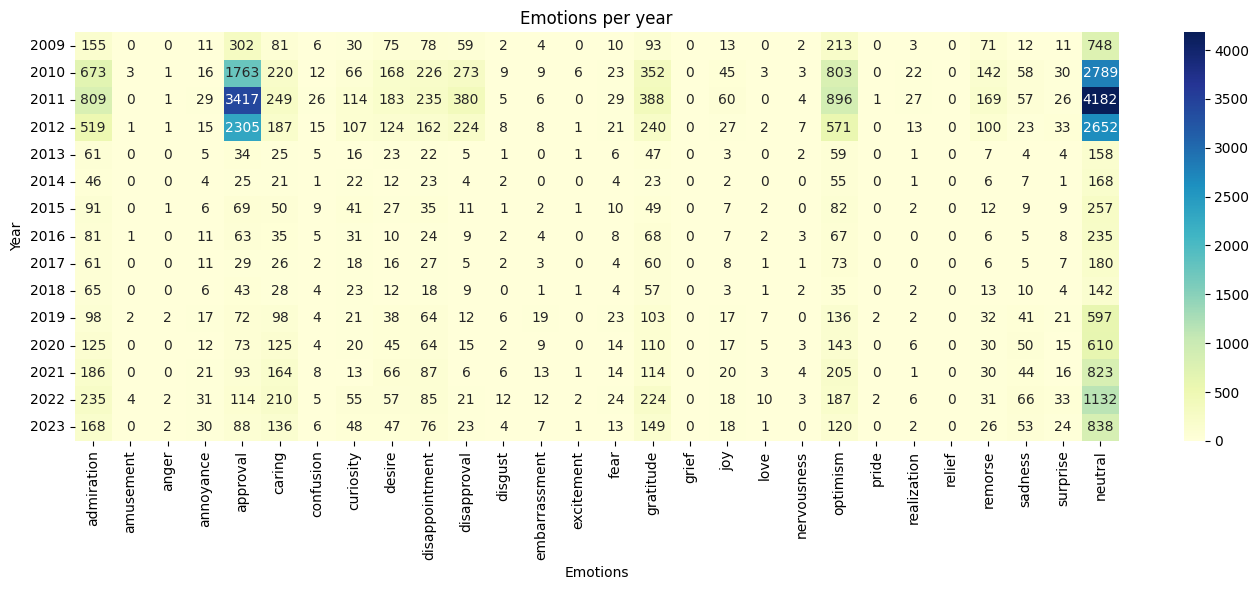

In [6]:
plt.figure(figsize=(14, 6))
sns.heatmap(by_year, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Emotions per year")
plt.xlabel("Emotions")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

In [7]:
# parties
by_party = texts.groupby('speaker_party')[mlb.classes_].sum()
by_party

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
speaker_party,,,,,,,,,,,,,,,,,,,,,
ALDE,470,0,3,18,546,244,11,75,134,142,...,5,4,460,1,12,0,91,71,32,1472
ECR,205,2,0,14,272,126,12,61,48,88,...,3,2,233,0,7,0,28,31,23,825
GUE/NGL,124,1,2,46,281,69,10,49,38,165,...,7,0,78,0,8,0,69,45,28,1727
Greens/EFA,218,2,1,27,263,157,13,71,89,153,...,5,3,225,0,5,0,79,56,33,1387
ID,118,2,2,34,606,63,15,89,19,68,...,4,3,138,0,4,0,17,14,16,870
NI,84,2,1,31,332,80,9,63,35,118,...,2,2,106,0,6,0,30,31,20,1166
PPE,1467,1,0,31,3881,559,15,120,293,247,...,7,16,1611,1,38,0,228,119,55,4957
S&D,687,1,1,24,2309,357,27,97,247,245,...,4,4,794,3,8,0,139,77,35,3107


In [8]:
dataset['speaker_party'].value_counts()

speaker_party
PPE           13733
S&D            8326
ALDE           3993
GUE/NGL        3068
Greens/EFA     2987
NI             2314
ID             2222
ECR            2127
Name: count, dtype: int64

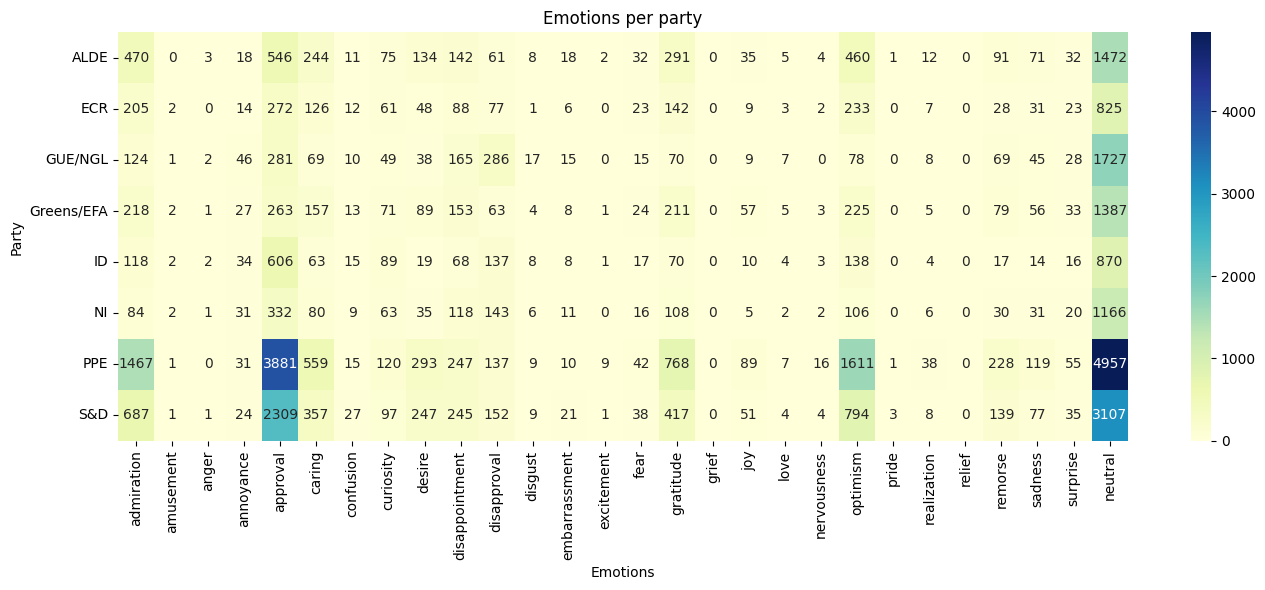

In [9]:
plt.figure(figsize=(14, 6))
sns.heatmap(by_party, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Emotions per party")
plt.xlabel("Emotions")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

### Explainability

In [10]:
from skmultilearn.model_selection import iterative_train_test_split
import numpy as np
import shap
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from collections import defaultdict
from transformers import TextClassificationPipeline

/home/biso/Uni/corsi/uni_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
X = dataset['text'].values.reshape(-1, 1)
X

array([[' Mr President, it was unexpected, but it is a joy – I believe – for everyone here no longer to have an Eastern or a Western Europe for the first time in this Parliament. We simply have a Europe that is symbolised by our President, who is in the Chamber today. (Applause) This is unity; this is also where our responsibilities lie, as you said earlier, Mr Buzek. Forgetting about East and West, in the two and a half years of your presidency, and speaking only of a single Europe – that is my wish, for you and for Europe.'],
       [' Mr President, on behalf of our group I would like to congratulate you on your election. We supported your election and, even though we should be careful not to overuse the term ‘historic moment’, I believe that your election as President of the European Parliament is indeed an historic moment. (Applause) The fact that 20 years after the fall of the Berlin Wall, six years after the accession of your country and many other Central and Eastern European co

In [12]:
mlb = MultiLabelBinarizer(classes=emotions)
Y = mlb.fit_transform(dataset['predicted_emotions'])
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(38770, 28))

In [13]:
test_size = (len(dataset) - 300) / len(dataset)
X_sampled, Y_sampled, _, _ = iterative_train_test_split(X, Y, test_size=test_size)
sampled_df = pd.DataFrame({
    'text': X_sampled.ravel(),
    'predicted_emotions': mlb.inverse_transform(Y_sampled)
})
sampled_df['predicted_emotions'] = sampled_df['predicted_emotions'].apply(list)

In [14]:
sampled_df

,text,predicted_emotions
0,"Mr President, it was unexpected, but it is a ...",[desire]
1,"Mr President, first of all congratulations fro...","[admiration, optimism]"
2,"Mr President, may I congratulate you on your p...",[admiration]
3,"Mr President, I am pleased that a neighbour f...","[gratitude, optimism]"
4,"Mr President, put the numbers on the screen so...",[neutral]
...,...,...
295,"Mr President, I too would like to express my ...",[annoyance]
296,"Mr President, I voted to amend the Regulation...","[approval, optimism]"
297,Negotiation of the budget is among the most i...,"[approval, neutral]"
298,"As regards Parliament’s position, I would lik...","[optimism, neutral]"


In [ ]:
def global_exp_shap_full(explainer, sentences, emotions, save_path="../data/global_shap_politics.csv"):
    shap_values = explainer(sentences)
    
    token_shap_agg = defaultdict(list)
    
    for i in range(len(sentences)):  
        tokens = shap_values.data[i]  
        shap_vals = shap_values.values[i]  # Shape: (n_tokens, n_emotions)
        
        for token_idx, token in enumerate(tokens):
            for emotion_idx in range(len(emotions)):
                key = (token, emotions[emotion_idx])
                token_shap_agg[key].append(shap_vals[token_idx, emotion_idx])
    
    agg_results = []
    for (token, emotion), shap_list in token_shap_agg.items():
        avg_shap = np.mean(shap_list)  
        agg_results.append({'token': token, 'emotion': emotion, 'avg_shap_value': avg_shap})

    df_global_shap = pd.DataFrame(agg_results)
    
    df_global = df_global_shap.pivot(index='token', columns='emotion', values='avg_shap_value')
    
    df_global.to_csv(save_path)
    
    return df_global

In [ ]:
model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
save_path = "../best_model_RoBERTa"
model = AutoModelForSequenceClassification.from_pretrained(save_path)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.eval().to(device)         

pipe = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,  
    function_to_apply='sigmoid',  
    device=0 if torch.cuda.is_available() else -1
)

explainer = shap.Explainer(pipe, tokenizer)

emotions = [
    "admiration", "amusement", "anger", "annoyance", "approval",
    "caring", "confusion", "curiosity", "desire", "disappointment",
    "disapproval", "disgust", "embarrassment", "excitement", "fear",
    "gratitude", "grief", "joy", "love", "nervousness", "optimism",
    "pride", "realization", "relief", "remorse", "sadness", "surprise", "neutral"
]

sentences = sampled_df['text'].astype(str).tolist()

Device set to use cuda:0
/home/biso/Uni/corsi/uni_venv/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
df_global_shap = global_exp_shap_full(
    explainer,
    sentences,
    emotions,
    save_path="../data/global_shap_politcs.csv"
)

PartitionExplainer explainer: 301it [52:40, 10.57s/it]                            


In [ ]:
global_exp = pd.read_csv("../data/global_shap_politcs.csv")
global_exp

,token,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
0,NaN,0.000011,-3.649364e-06,1.520490e-05,0.000061,0.000514,0.000414,-0.000086,-0.000022,0.000097,...,-3.897351e-07,-0.000005,-0.000591,0.000124,0.000010,0.000034,0.000008,0.000009,-0.000032,-0.000001
1,,0.000163,-8.542574e-06,5.716272e-05,0.000167,0.003015,0.001087,-0.000284,-0.000081,0.000217,...,1.003757e-05,-0.000008,-0.003935,0.000125,0.000034,-0.000023,0.000059,-0.000004,0.000048,0.000039
2,!,0.001484,2.458389e-05,6.280817e-06,-0.000122,0.000975,0.000210,-0.000151,-0.000186,-0.000367,...,1.056287e-06,-0.000003,-0.001283,0.000260,0.000081,-0.000051,0.000153,-0.000018,-0.000052,0.000013
3,!,0.000480,1.272984e-05,2.343559e-04,0.001432,-0.000196,0.001478,-0.000241,-0.000505,-0.000010,...,-3.700234e-05,0.000025,-0.005542,0.000840,0.000010,0.000192,-0.000028,-0.000031,-0.000087,0.000061
4,%,0.000014,-2.001943e-06,2.088856e-07,0.000047,0.000598,0.000114,-0.000068,0.000002,0.000116,...,2.390027e-06,0.000001,-0.000956,0.000439,0.000007,0.000069,0.000006,0.000009,0.000099,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,‘,-0.000013,4.206563e-07,-2.048929e-05,-0.000070,-0.000687,0.000157,0.001707,0.000051,0.000037,...,9.959233e-06,0.000021,-0.000668,0.000977,0.000009,0.000100,0.000034,0.000006,0.000020,0.000009
7995,’,0.000264,-8.670148e-06,-1.452180e-05,0.000007,0.000600,0.000269,0.000042,0.000170,0.000154,...,5.470397e-06,0.000044,-0.001908,0.000580,0.000023,0.000105,0.000017,0.000014,0.000058,0.000114
7996,’,-0.000004,-1.056494e-05,-2.083706e-06,0.000026,0.000549,0.000223,0.000106,0.000089,0.000137,...,2.150031e-06,0.000010,-0.001173,0.000558,-0.000006,0.000047,0.000003,0.000045,0.000017,0.000169
7997,…,0.000133,2.129334e-05,-1.032576e-05,-0.000016,-0.000066,0.000006,-0.000518,0.000361,0.000109,...,1.844185e-06,-0.000018,0.000150,0.000107,0.000002,0.000002,0.000002,0.000001,-0.000009,0.000006


In [26]:
global_exp.sort_values(by='admiration', ascending=False).head(10)

,token,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
1652,appreciated,0.211381,-0.000069,-0.000183,-0.001320,-0.021368,-0.012990,-0.000056,-1.082128e-04,-0.004341,...,0.000202,0.000019,-0.089388,-0.049358,0.003659,0.000223,0.000641,0.000218,-0.000110,0.000154
1640,applaud,0.154603,-0.000212,0.000030,-0.000497,-0.037533,-0.004153,-0.000389,-3.487649e-04,-0.001852,...,-0.000010,-0.000179,-0.070632,-0.007360,0.001724,-0.001518,-0.001763,-0.000015,-0.000545,0.000119
4798,liked,0.068393,0.000160,-0.000090,-0.000800,0.003285,-0.003379,-0.002089,-1.770263e-02,0.007658,...,0.012658,-0.000045,-0.046171,-0.005257,0.000311,-0.000352,0.000079,0.000017,0.000092,-0.002979
2448,congrat,0.063718,-0.000024,0.000057,-0.000195,-0.004482,0.002302,-0.000102,-2.617202e-05,0.002583,...,0.000029,-0.000007,-0.078032,0.008306,0.001098,-0.001647,0.000314,-0.000002,-0.000023,0.000109
4602,job,0.060789,-0.000034,-0.000156,-0.001050,0.000082,0.000897,-0.000050,-9.698331e-07,-0.000030,...,0.000039,-0.000054,-0.033885,0.001185,0.000148,-0.000418,-0.000079,0.000010,-0.000626,0.000018
6783,sincerely,0.056391,-0.000051,-0.000115,-0.002006,-0.003795,0.003621,-0.000679,-7.347865e-03,-0.008834,...,0.000051,-0.000039,-0.060577,0.011636,0.001463,-0.000990,0.000420,0.000102,-0.000091,0.000128
6008,proud,0.047411,-0.000162,0.000330,0.000461,-0.026763,-0.001057,-0.000121,-9.980812e-06,0.000657,...,0.000004,0.000074,-0.027217,-0.003278,0.012025,-0.000250,0.001286,0.000109,0.000035,0.000172
2451,congratulations,0.045335,-0.000057,-0.000254,-0.002443,-0.006516,-0.004244,-0.000244,-1.950492e-04,-0.002715,...,-0.000039,-0.002822,-0.036207,-0.001867,0.000966,-0.000473,0.000739,0.000057,-0.000811,0.000152
2449,congratulate,0.042609,0.000002,-0.000069,-0.001073,-0.010456,-0.000750,-0.000933,-9.694232e-04,-0.010999,...,-0.000087,-0.000051,-0.050059,0.005371,0.001446,-0.000768,0.000609,-0.000038,-0.000191,0.000258
3389,excellent,0.042499,-0.000026,-0.000199,-0.001567,0.000688,-0.000228,0.000052,3.070078e-05,-0.000308,...,0.000030,0.000006,-0.024220,0.000493,0.000204,0.000138,-0.000024,0.000021,-0.000200,-0.000006


In [27]:
global_exp.sort_values(by='anger', ascending=False).head(10)

,token,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
1598,angry,-0.000454,0.000221,0.006468,0.016251,-0.001375,-0.000393,-0.000056,0.000035,0.000147,...,5.644929e-07,0.000014,-0.019510,-0.000999,-0.000050,-0.000906,-0.000315,-0.000058,0.000521,0.000054
293,Belgium,-0.000454,0.000221,0.006468,0.016251,-0.001375,-0.000393,-0.000056,0.000035,0.000147,...,5.644929e-07,0.000014,-0.019510,-0.000999,-0.000050,-0.000906,-0.000315,-0.000058,0.000521,0.000054
6475,ridiculous,-0.000003,0.000387,0.006374,0.034014,-0.000730,-0.003209,-0.001090,-0.001752,-0.005697,...,-6.434392e-06,0.000045,-0.026782,-0.002844,0.000008,-0.000432,-0.000047,-0.000140,-0.000731,0.000239
4517,irritation,0.000061,0.000063,0.005852,0.071683,-0.001792,-0.001773,0.000058,0.000227,-0.004127,...,-1.078191e-05,0.000081,-0.076294,-0.001517,0.000067,-0.000014,-0.000005,-0.000089,0.000103,0.000084
490,Enough,-0.000018,0.000053,0.005264,0.025015,-0.000165,0.000958,-0.003995,-0.002928,-0.001691,...,4.073158e-06,0.000103,-0.019113,-0.002198,-0.000001,0.000158,-0.000005,-0.000024,0.000126,0.000121
5242,nonsense,-0.000002,0.000341,0.004998,0.026388,-0.000550,-0.001687,-0.001089,-0.001744,-0.004425,...,-7.530534e-06,0.000017,-0.021484,-0.001887,0.000007,-0.000344,-0.000034,-0.000114,-0.000563,0.000200
3541,fashion,0.000234,0.000056,0.003068,0.025901,-0.000973,-0.000023,-0.000008,0.000021,-0.000020,...,3.130632e-06,0.000014,-0.026595,-0.000131,0.000036,-0.000278,-0.000010,-0.000070,-0.000046,0.000080
1710,arrogant,0.000234,0.000056,0.003068,0.025901,-0.000973,-0.000023,-0.000008,0.000021,-0.000020,...,3.130632e-06,0.000014,-0.026595,-0.000131,0.000036,-0.000278,-0.000010,-0.000070,-0.000046,0.000080
2830,denounce,-0.000548,-0.000026,0.002437,0.004379,-0.000302,-0.001159,-0.000049,-0.000052,0.000105,...,3.897447e-07,-0.000062,-0.016487,0.000183,-0.000023,-0.000263,-0.000055,0.000016,-0.000640,-0.000032
2515,contempt,-0.000185,-0.000152,0.002226,0.015128,-0.001572,-0.000008,-0.000212,-0.000025,-0.000064,...,7.037567e-06,0.000013,-0.051407,-0.000258,0.000012,-0.000043,-0.000034,-0.000093,-0.000093,0.000046


In [ ]:
def heatmap_top10_tokens(heatmap_matrix, tokens):
    plt.figure(figsize=(20, 9))

    ax = sns.heatmap(
        heatmap_matrix, 
        vmin=-1, vmax=1,  
        cmap='coolwarm',  
        annot=tokens,  
        fmt='',  
        cbar_kws={'label': 'SHAP Value'}
    )

    # Labels
    ax.set_yticks(np.arange(len(emotions)) + 0.5)
    ax.set_yticklabels(emotions, rotation=0)

    plt.title('Top 10 Token per Emozione (SHAP Heatmap)')
    plt.xlabel('Token Rank')
    plt.ylabel('Emotion')

    plt.tight_layout()
    plt.show()

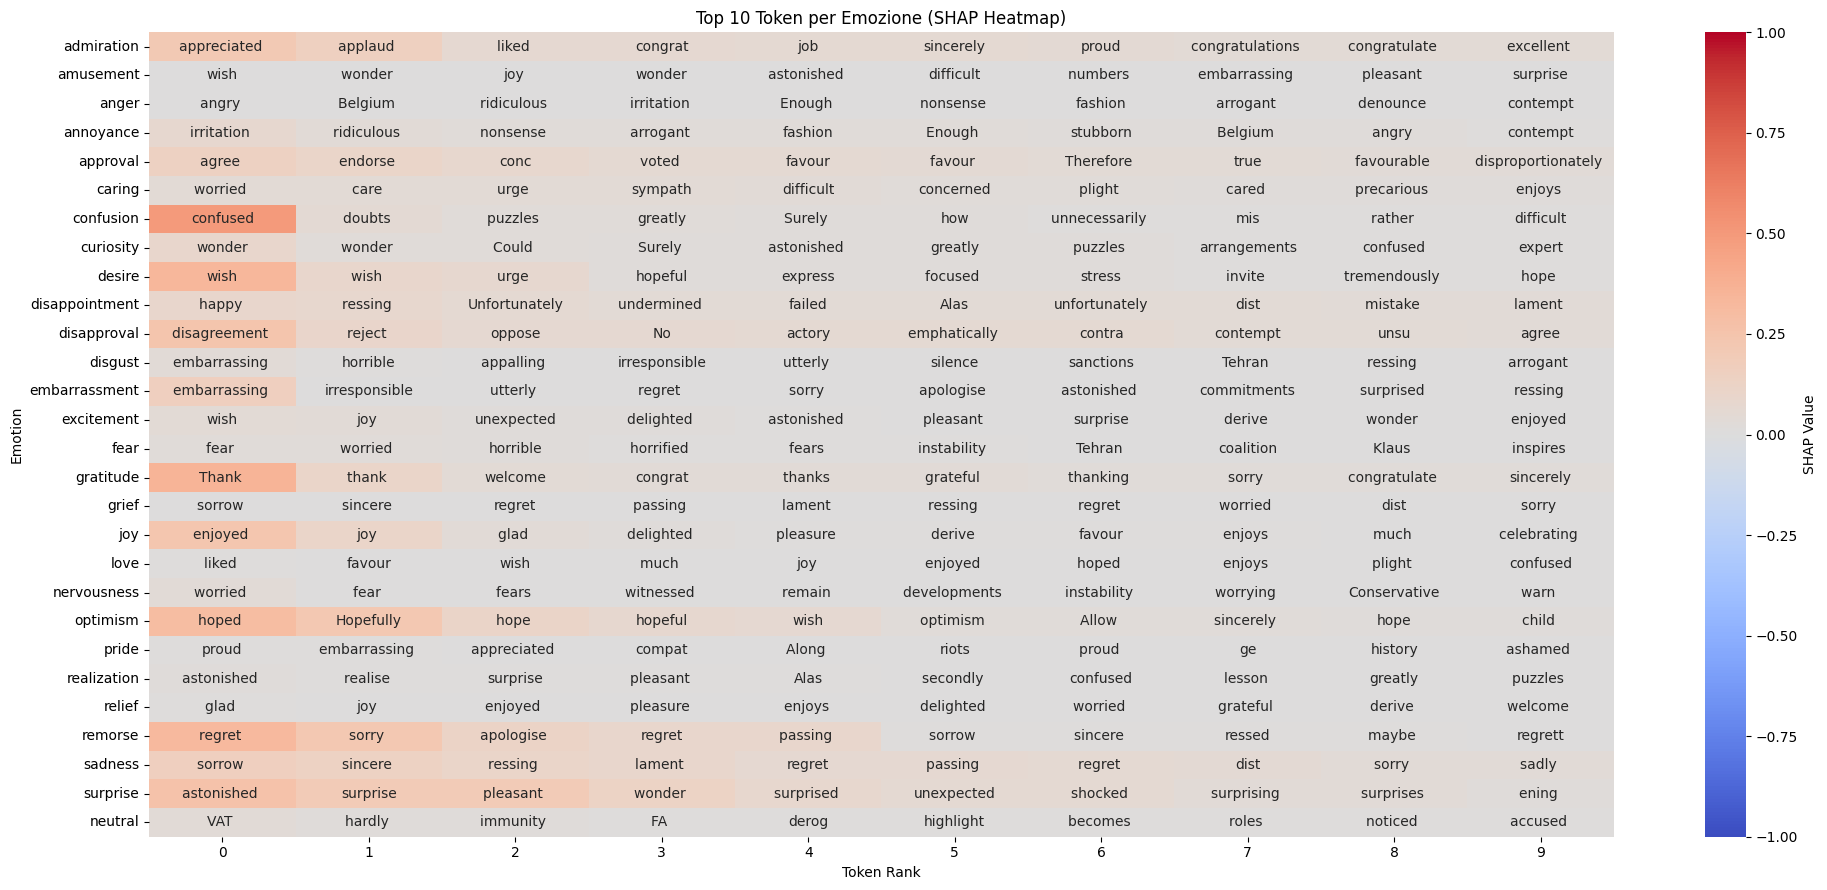

In [29]:
heatmap_data = []
tokens = []

for emotion in emotions:
    top_tokens = global_exp[['token', emotion]].sort_values(by=emotion, ascending=False).head(10)
    heatmap_data.append(top_tokens[emotion].values)
    tokens.append(top_tokens['token'].values)

heatmap_matrix = np.array(heatmap_data)
tokens_matrix = np.array(tokens)

heatmap_top10_tokens(heatmap_matrix, tokens)